Step 1: Data Cleaning
You have collected your data, time to further clean it.

A cleaned dataset is a dataset that doesn't contain any duplicates, has no blank spaces, and has no other obvious errors.<br> The rest of the analysis is worthless if you neglect this step; Garbage In, Garbage Out.

Take care of the following:

- No duplicates
- No blank spaces (e.g. " I love python " => "I love python")
- No empty values (set them to None or NaN)
- No wrongly encoded values (e.g. a text value in the price column)

In [ ]:
import pandas as pd
import numpy as np
import csv

## Merge dataframes

In [ ]:
immo_house = pd.read_csv(r"C:\Users\fabie\OneDrive\Documenten\BeCodeGhent\Projects\immo-eliza-MAS-FN-analysis\data\RawData_house_sale.csv")
immo_apartment = pd.read_csv(r"C:\Users\fabie\OneDrive\Documenten\BeCodeGhent\Projects\immo-eliza-MAS-FN-analysis\data\RawData_apartment_sale.csv")

In [ ]:
merged = pd.concat([immo_house, immo_apartment])

# write to csv
import os

path = r'C:\Users\fabie\OneDrive\Documenten\BeCodeGhent\Projects\immo-eliza-MAS-FN-analysis\data'
merged.to_csv(os.path.join(path,r'RawData_merged.csv'))

#merged.to_csv("RawData_merged.csv")


## Exploring the DataFrame

In [ ]:
display(immo_house.head(10))


In [ ]:
immo_house.info()

In [ ]:
immo_house.shape

In [ ]:
immo_house.describe()

## Components of the DF

In [ ]:
immo_house.values

In [ ]:
immo_house.columns

In [ ]:
immo_house.index


## Check Missing values

In [ ]:
# detect missing values
immo_house.isna()
# detect any missing values
immo_house.isna().any()
# count missing values
immo_house.isna().sum()
# sort sum of missing values
missing_sorted = immo_house.isna().sum().sort_values(ascending=False)
display(missing_sorted)
display(type(missing_sorted))

In [ ]:
# Plotting missing values
import matplotlib.pyplot as plt
missing_sorted.plot(kind='bar')
plt.show()

## Remove columns

In [ ]:
# Remove 6 columns that have the most missing values:
#['garden_area', 'fireplace', 'garden', 'swimming_pool', 'furnished','terrace_area']
remove_columns = missing_sorted ['garden_area':'terrace_area']
display(remove_columns)
print(type(remove_columns))


In [ ]:
#immo_drop = immo_df.drop(columns = [remove_columns], inplace=True)
#print(immo_drop)

In [ ]:
#immo_df.drop(columns = ['garden_area', 'fireplace', 'garden', 'swimming_pool', 'furnished','terrace_area'], inplace=True)
#display(immo_df)

## Remove duplicates: there are no duplicates in the raw data

## Check for blank spaces in strings

## Check for empty values: 

In [ ]:
#immo_null = immo_drop_dup.isnull() #is the same as isna()
#display(immo_null)
#immo_nan = immo_drop_dup.replace('', np.nan, inplace=False)
#display(immo_nan)

In [ ]:
display(immo_house.isnull().sum().sort_values(ascending=False)) # check numbers of null value in each column
#immo_nan = immo_house.fillna("NaN") # Replace empty/null values with "NaN"
#display(immo_nan.isnull().sum()) # check numbers of null value in each column
#display(immo_nan)

## Remove rows with missing values

In [ ]:
# Function to drop observations with missing 'id' and 'price'
def drop_missing_values(df):
    """
    Drop observations with missing values in 'id' and 'price' columns.
    Parameters:
    - df: pandas DataFrame, the DataFrame to be cleaned
    Returns:
    - pandas DataFrame, the cleaned DataFrame
    """
    # Drop missing observations for 'id' and 'price' columns
    df_cleaned = df.dropna(subset=['id', 'price', 'province', 'region'])

    # Check if there are any missing values left in 'id' and 'price' columns
    if df_cleaned['id'].isnull().any() or df_cleaned['price'].isnull().any() or df_cleaned['province'].isnull().any() or df_cleaned['region'].isnull().any():
        print("Warning: Missing values still present after dropping.")
    else:
        print("Missing values in 'id', 'price', 'province' and 'region' successfully dropped.")

    return df_cleaned

# Replace 'house' with the actual name of your DataFrame
house_cleaned = drop_missing_values(immo_house)
display(house_cleaned.head())

# Save the cleaned DataFrame as 'house_cleaned.csv' in the 'Data' folder

import os

path = r'C:\Users\fabie\OneDrive\Documenten\BeCodeGhent\Projects\immo-eliza-MAS-FN-analysis\data'
house_cleaned.to_csv(os.path.join(path,r'house_cleaned.csv'))
#house_cleaned.to_csv(os.path.join(data_folder, 'house_cleaned.csv'), index=False)


## Filter the dataframe

In [ ]:
print(house_cleaned['property_type'])
import pandas as pd

# Filter the DataFrame to keep only rows where the property subtype is "HOUSE"
house_cleaned1 = house_cleaned[house_cleaned['property_type'] == 'HOUSE']
house_cleaned2 = house_cleaned1[house_cleaned1['property_subtype'] != 'APARTMENT_BLOCK']

# Display the filtered DataFrame
display(house_cleaned1.head())


In [ ]:
# Explore house_cleaned2
house_cleaned2.shape
house_cleaned2.count()
house_cleaned2.info()
house_cleaned2.describe()

## Transform /fill missing values in the numeric column with the median of each group.

In [ ]:
# Function to Sort the DataFrame by the categorical column, then transform /fill missing values in the numeric column with the median of each group.

from IPython.display import display

def impute_missing_by_group_median(df, categorical_column, numeric_column):
    """
    Impute missing values in a numeric column by the median of each categorical group.
    Parameters:
        df (DataFrame): Input DataFrame.
        categorical_column (str): Name of the categorical column for grouping.
        numeric_column (str): Name of the numeric column with missing values to be imputed.
    Returns:
        DataFrame: DataFrame with missing values imputed by group median.
    """
    # Check if the specified columns exist in the DataFrame
    if categorical_column not in df.columns or numeric_column not in df.columns:
        print(f"Error: One or more specified columns not found in the DataFrame.")
        return df

    # Sort DataFrame by the categorical column
    df_sorted = df.sort_values(by=categorical_column)

    # Print the summary of 'living_area' by 'number_rooms' before imputation
    summary_before = df_sorted.groupby(categorical_column)[numeric_column].describe()
    print(f"\nSummary of '{numeric_column}' by '{categorical_column}' before imputation:")
    display(summary_before)

    # Print the number of missing values before imputation
    missing_values_before = df_sorted[numeric_column].isna().sum()
    print(f"Number of missing values in '{numeric_column}' before imputation: {missing_values_before}")

    # Impute missing values by group median
    df_imputed = df_sorted.copy()
    df_imputed[numeric_column] = df_sorted.groupby(categorical_column)[numeric_column].transform(lambda x: x.fillna(x.median()))

    # Print the number of missing values after imputation
    missing_values_after = df_imputed[numeric_column].isna().sum()
    print(f"Number of missing values in '{numeric_column}' after imputation: {missing_values_after}")

    # Display the summary of 'living_area' by 'number_rooms' after imputation
    summary_after = df_imputed.groupby(categorical_column)[numeric_column].describe(include='all')
    print(f"\nSummary of '{numeric_column}' by '{categorical_column}' after imputation:")
    display(summary_after)

    # Display the resulting DataFrame for 'number_rooms' = 1 after imputation
    result_df = df_imputed[df_imputed[categorical_column] == 1][['number_rooms', numeric_column]]
    display(result_df)

    return df_imputed

# Example usage:
# Assuming df_filtered is your DataFrame and you want to impute missing values in 'living_area' by 'number_rooms'
house_imputed = impute_missing_by_group_median(house_cleaned2, categorical_column='number_rooms', numeric_column='living_area')

## Check for Unique or missing values

### Analysis of parking_indoor, parking_outdoor, surface_land, number_facades, surface_land

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def analyze_column(df, column_name):
    column = df[column_name]
    num_nan = column.isnull().sum()
    num_unique = column.nunique()
    unique_values = column.unique()
    percentage_nan = (num_nan / len(column)) * 100
    percentage_unique = (num_unique / len(column)) * 100
    print(f"Analysis for column '{column_name}':")
    print(f"Number of NaN values: {num_nan}")
    print(f"Number of unique values: {num_unique}")
    print(f"Percentage of NaN values: {percentage_nan:.2f}%")
    print(f"Percentage of unique values: {percentage_unique:.2f}%")
    print(f"Unique values: {unique_values}")

parking_indoor = analyze_column(immo_house, "parking_indoor")


In [ ]:
def plot_histogram(data, column_name):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=column_name, bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate x-tick labels by 45 degrees
    plt.tight_layout()  # Adjust layout to prevent overlapping,
    plt.show()

# parking_indoor = plot_histogram(immo_house, "parking_outdoor")

In [ ]:
def analyze_column(df, column_name):
    column = df[column_name]
    num_nan = column.isnull().sum()
    num_unique = column.nunique()
    unique_values = column.unique()
    percentage_nan = (num_nan / len(column)) * 100
    percentage_unique = (num_unique / len(column)) * 100
    print(f"Analysis for column '{column_name}':")
    print(f"Number of NaN values: {num_nan}")
    print(f"Number of unique values: {num_unique}")
    print(f"Percentage of NaN values: {percentage_nan:.2f}%")
    print(f"Percentage of unique values: {percentage_unique:.2f}%")
    print(f"Unique values: {unique_values}")

parking_outdoor = analyze_column(immo_house, "parking_outdoor")

In [ ]:
def analyze_column(df, column_name):
    column = df[column_name]
    num_nan = column.isnull().sum()
    num_unique = column.nunique()
    unique_values = column.unique()
    percentage_nan = (num_nan / len(column)) * 100
    percentage_unique = (num_unique / len(column)) * 100
    print(f"Analysis for column '{column_name}':")
    print(f"Number of NaN values: {num_nan}")
    print(f"Number of unique values: {num_unique}")
    print(f"Percentage of NaN values: {percentage_nan:.2f}%")
    print(f"Percentage of unique values: {percentage_unique:.2f}%")
    print(f"Unique values: {unique_values}")

number_facades = analyze_column(immo_house, "number_facades")

In [ ]:
def analyze_column(df, column_name):
    column = df[column_name]
    num_nan = column.isnull().sum()
    num_unique = column.nunique()
    unique_values = column.unique()
    percentage_nan = (num_nan / len(column)) * 100
    percentage_unique = (num_unique / len(column)) * 100
    print(f"Analysis for column '{column_name}':")
    print(f"Number of NaN values: {num_nan}")
    print(f"Number of unique values: {num_unique}")
    print(f"Percentage of NaN values: {percentage_nan:.2f}%")
    print(f"Percentage of unique values: {percentage_unique:.2f}%")
    print(f"Unique values: {unique_values}")

price = analyze_column(immo_house, "price")

In [ ]:
def analyze_column(df, column_name):
    column = df[column_name]
    num_nan = column.isnull().sum()
    num_unique = column.nunique()
    unique_values = column.unique()
    percentage_nan = (num_nan / len(column)) * 100
    percentage_unique = (num_unique / len(column)) * 100
    print(f"Analysis for column '{column_name}':")
    print(f"Number of NaN values: {num_nan}")
    print(f"Number of unique values: {num_unique}")
    print(f"Percentage of NaN values: {percentage_nan:.2f}%")
    print(f"Percentage of unique values: {percentage_unique:.2f}%")
    print(f"Unique values: {unique_values}")

surface_land = analyze_column(immo_house, "surface_land")

In [ ]:
#showing outliers
def scatter_plot(data, column_name):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=house_cleaned, x=column_name, y="price", color='skyblue')
        plt.title(f'Scatter Plot of {column_name}')
        plt.xlabel(f'{column_name}')
        plt.ylabel('price')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

#number_facades = scatter_plot(house_cleaned, "parking_outdoor")

## Show and remove outliers

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy import stats

cols = ["number_rooms", "living_area", "fireplace", "terrace_area", 
           "garden_area", "surface_land", "number_facades", "EnergyConsumptionPerSqm", 
           "parking_outdoor", "parking_indoor"]

for col in cols:
    # Calculate the z-score for col in cols
    z = np.abs(stats.zscore(house_cleaned2[col]))

    # Identify outliers with a z-score greater than 3
    threshold = 3
    outliers = house_cleaned2[z > threshold]

    # drop rows containing outliers
    house_cleaned_outliers = house_cleaned2.drop(outliers.index)

    # replace outliers with median value
    house_cleaned_median = house_cleaned2.loc[z > threshold, col] = house_cleaned2[col].median()

# calculate IQR for col in cols
for col in cols:
    Q1 = house_cleaned2[col].quantile(0.25)
    Q3 = house_cleaned2[col].quantile(0.75)
    IQR = Q3 - Q1
    print(col,':', IQR)

# identify outliers
threshold = 1.5
outliers = house_cleaned2[(house_cleaned2[col] < Q1 - threshold * IQR) | (house_cleaned2[col] > Q3 + threshold * IQR)]


<Axes: title={'center': 'surface_land'}, xlabel='price'>

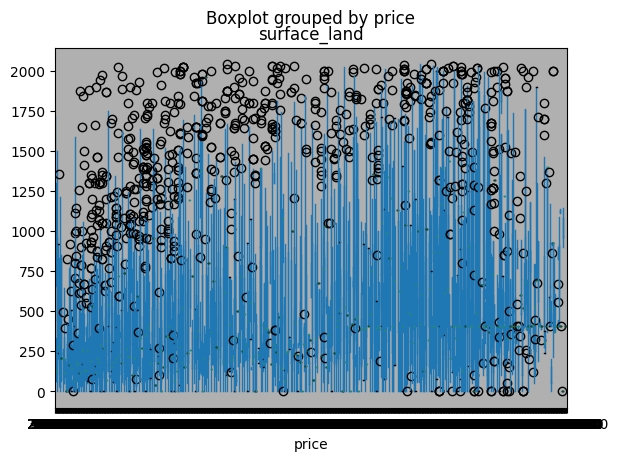

In [296]:
house_cleaned2.boxplot(column=['surface_land'], by='price')

In [294]:
for col in cols:
    hist = px.histogram(house_cleaned_outliers, x=col, y='price')
    hist.show()

In [ ]:
for col in cols:
    box = px.box(house_cleaned_outliers, y=col)
    box.show()

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

cols = ["number_rooms", "living_area", "fireplace", "terrace_area", 
           "garden_area", "surface_land", "number_facades", "EnergyConsumptionPerSqm", 
           "parking_outdoor", "parking_indoor"]
for col in cols:
    scatter = px.scatter(house_cleaned2, x='property_subtype', y=col)
    scatter.show()

In [ ]:
scatter = px.scatter(house_cleaned, x='property_subtype', y='price')
scatter.show()

In [ ]:
def remove_outliers_zscore(df, column_name, threshold=3):
    """
    Remove outliers from a DataFrame based on the Z-score method.

    Parameters:
        df (DataFrame): Input DataFrame.
        column_name (str): Name of the column containing the data points.
        threshold (float): Z-score threshold for identifying outliers. Default is 3.

    Returns:
        DataFrame: DataFrame with outliers removed.
    """
    # Calculate Z-scores for the specified column
    z_scores = (df[column_name] - df[column_name].mean()) / df[column_name].std()
    
    # Create a mask to identify outliers
    outlier_mask = np.abs(z_scores) > threshold
    
    print(outlier_mask)

    # Remove outliers from the DataFrame
    #df_filtered = df[~outlier_mask]

    #return df_filtered

#remove_outliers_zscore(house_cleaned, "parking_indoor")

In [ ]:
# detect missing values
house_cleaned2.isna()
# detect any missing values
house_cleaned2.isna().any()
# count missing values
house_cleaned2.isna().sum()
# sort sum of missing values
missing_sorted = house_cleaned2.isna().sum().sort_values(ascending=False)
display(missing_sorted)
display(type(missing_sorted))

## Histogram: price, surface_land

In [288]:
print(house_cleaned2['surface_land'])
hist = px.histogram(house_cleaned_outliers, x='surface_land', y='price')
hist.show()
hist = px.histogram(house_cleaned_outliers, x='living_area', y='price')
hist.show()

0         90.0
1        555.0
2        196.0
3        601.0
4        261.0
         ...  
19972     90.0
19973    137.0
19974    405.0
19975    178.0
19976    127.0
Name: surface_land, Length: 14513, dtype: float64


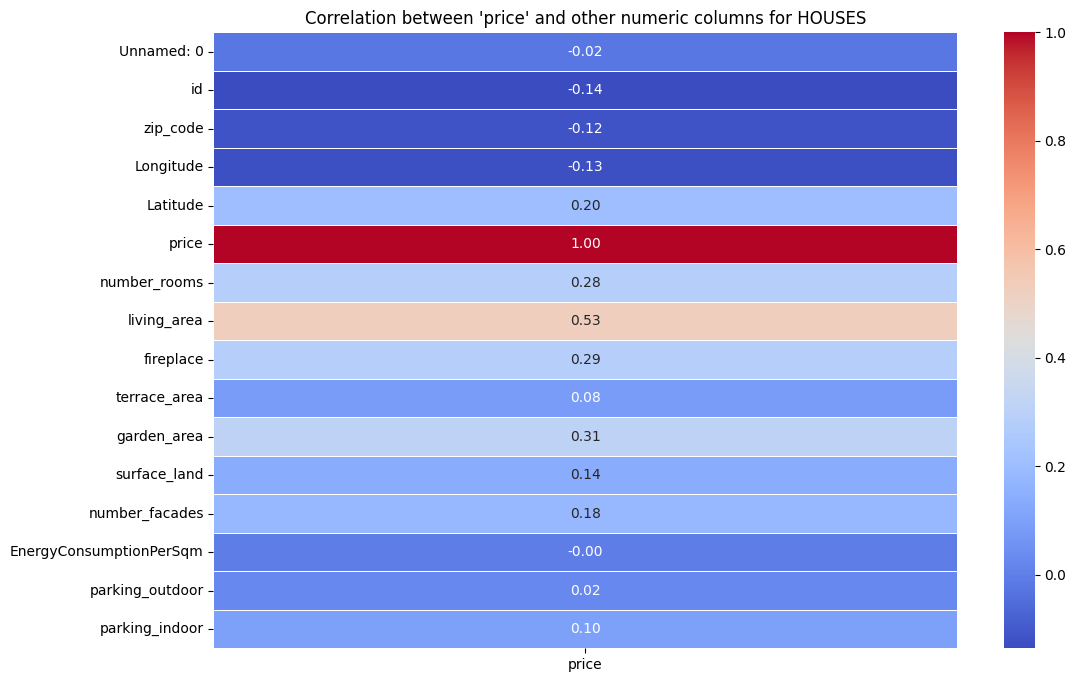

In [293]:
def visualize_price_correlation_heatmap(df, subtype='HOUSE'):
    """
    Visualize the correlation between 'price' and other numeric columns using a heatmap for a specific property subtype.

    Parameters:
        df (DataFrame): Input DataFrame.
        subtype (str): Property subtype to filter the DataFrame (default: 'house').
    """
    # Filter DataFrame by property subtype
    subset_df = df[df['property_subtype'] == subtype]

    # Select only numeric columns
    numeric_df = subset_df.select_dtypes(include='number')

    # Calculate the correlation matrix
    correlation_matrix = numeric_df.corr()

    # Create a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix[['price']], annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f"Correlation between 'price' and other numeric columns for {subtype}S")
    plt.show()

# Assuming 'house_cleaned2' is your DataFrame
visualize_price_correlation_heatmap(house_cleaned2)

In [286]:
column_name = list(house_cleaned.columns)
display(column_name)


['Unnamed: 0',
 'url',
 'id',
 'region',
 'province',
 'locality',
 'zip_code',
 'Longitude',
 'Latitude',
 'property_type',
 'property_subtype',
 'price',
 'number_rooms',
 'living_area',
 'kitchen',
 'furnished',
 'fireplace',
 'terrace',
 'terrace_area',
 'garden',
 'garden_area',
 'surface_land',
 'number_facades',
 'swimming_pool',
 'building_state',
 'energy_type',
 'EPC_score',
 'EnergyConsumptionPerSqm',
 'parking_outdoor',
 'parking_indoor']